# Import Dependencies 

In [1]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Column Descriptions 

#### id = Spotify URI of the song
#### name = name of the song 
#### artist = Artist who wrote the song
#### danceability = Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
#### Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
#### key = The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.
#### loudness = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
#### mode = Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
#### speechiness = Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
#### acousticness = A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
#### instrumentalness = Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
#### liveness = Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
#### valence = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#### tempo = The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
#### duration_ms = The duration of the track in milliseconds.
#### time_signature = An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [2]:
file = 'top2018.csv'
top18 = pd.read_csv(file)
top18.head()


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


# Finding Which Artist has the most songs in the top 100 of 2018

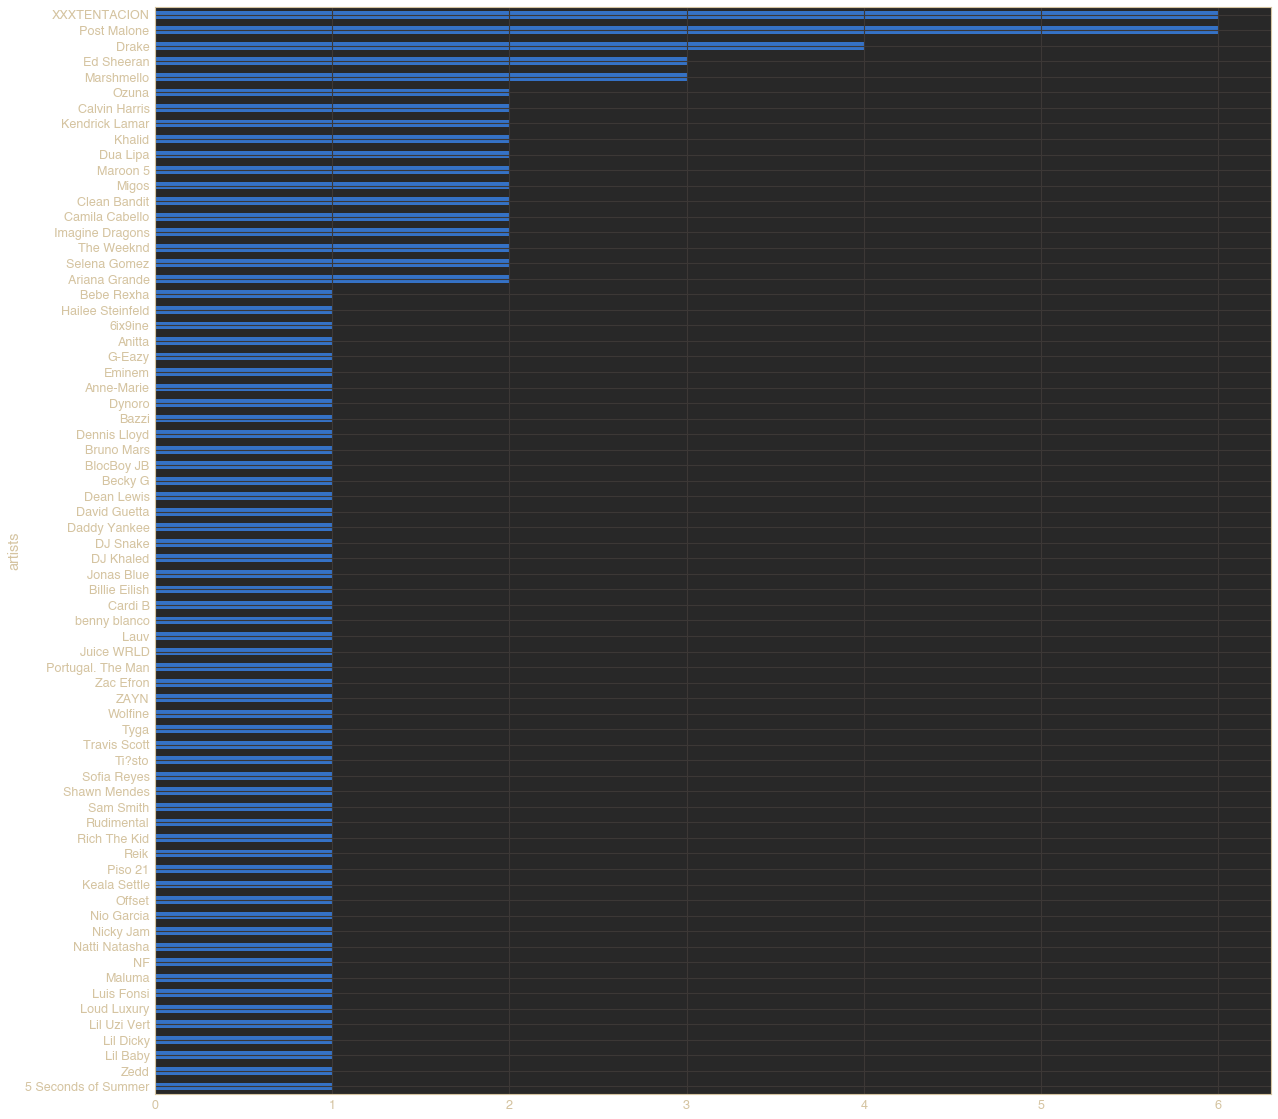

In [3]:
top18_by_artist = top18.groupby('artists')['name']
top18_by_artist.count().sort_values(ascending = True).plot.barh(figsize = (20,20))


## Findings 

#### XXX and Post Malone have the most songs in the top 100 of 2018, tied at 6 songs each. They are followed by drake who has 4 and every other artist who has either 3 or less songs. Its interesting to see that the top 3 artist are all considered rappers. 

# Heatmap 

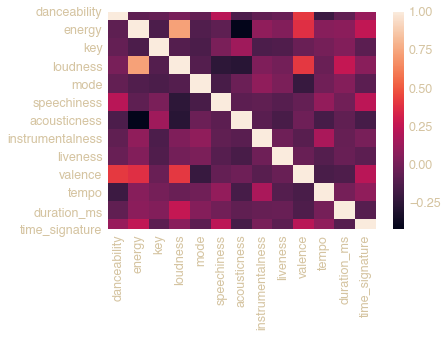

In [4]:
sns.heatmap(top18.corr(), annot=False)

## Correlation 

### This heat map will show the correlations using the corr function from pandas and then using that we make a heat map to show the correlations between certain columns.

# Danceabilty

Text(0.5, 1.0, 'Danceability in Top Songs of 2018')

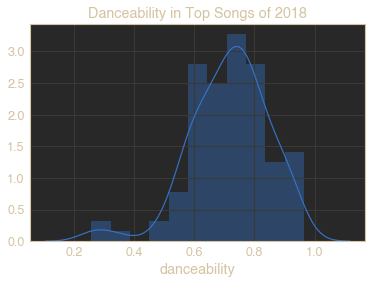

In [5]:
sns.distplot(top18['danceability'], hist=True, kde=True).set_title("Danceability in Top Songs of 2018")


## Findings

### Clear to see that most of the tracks are considered danceable from values higher than 0.5. As you cann see over 90% are considered dancable to very danceable if we group them by 

### danceabilty >= 0.75 ---> Very danceable 
### danceabilty >= 0.50 - 0.75 ---> Regular danceable 
### danceabilty < 0.50 ---> Not danceable at all

# Energy 

Text(0.5, 1.0, 'Energy in Top Songs of 2018')

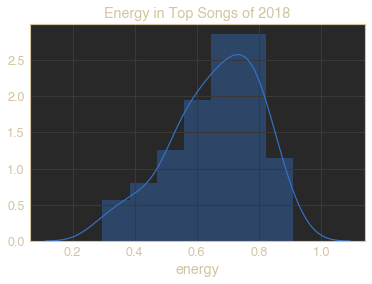

In [6]:
sns.distplot(top18['energy']).set_title("Energy in Top Songs of 2018")

## Findings 
### As you can see from the graph a majority of the songs in group between the 0.60 to 0.80. If we group them like we did for the danceability we will see that about 80 percent fall into the regular / very eneregetic catergories.

# Correlation 
### After looking at the heatmap, we notice a few variables that we can consider more important or play a bigger role in these songs. These categories being danceabilty, energy, valence, loudness, and tempo 

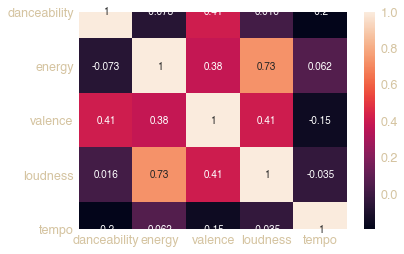

In [7]:
correlation = top18[['danceability','energy','valence','loudness','tempo']]
sns.heatmap(correlation.corr(), annot=True)


# Top 10 of most danceable songs 

In [13]:
top18[['name','artists','danceability','valence','tempo']].sort_values(by='danceability', ascending = False).head(10)

,name,artists,danceability,valence,tempo
91,Yes Indeed,Lil Baby,0.964,0.562,119.958
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.376,125.978
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.595,140.022
18,Moonlight,XXXTENTACION,0.921,0.711,128.009
61,Nonstop,Drake,0.912,0.422,154.983
89,Bella,Wolfine,0.909,0.844,94.016
73,Walk It Talk It,Migos,0.909,0.406,145.905
82,HUMBLE.,Kendrick Lamar,0.908,0.421,150.011
21,Te Bot? - Remix,Nio Garcia,0.903,0.442,96.507
30,Taste (feat. Offset),Tyga,0.884,0.342,97.994


# Top 10 songs with the most energy 

In [14]:
top18[['name','artists','energy','valence','tempo']].sort_values(by='energy', ascending = False).head(10)

,name,artists,energy,valence,tempo
12,Nice For What,Drake,0.909,0.757,93.394
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.895,0.794,94.968
34,?chame La Culpa,Luis Fonsi,0.889,0.649,96.024
9,FRIENDS,Marshmello,0.880,0.534,95.079
7,One Kiss (with Dua Lipa),Calvin Harris,0.862,0.592,123.994
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,0.926,105.115
23,Youngblood,5 Seconds of Summer,0.854,0.152,120.274
41,Dura,Daddy Yankee,0.848,0.828,95.000
45,Jackie Chan,Ti?sto,0.834,0.687,128.005
43,Thunder,Imagine Dragons,0.822,0.288,167.997


# Top 10 Songs that create Positive feelings

In [15]:
top18[['name','artists','energy','valence','tempo']].sort_values(by='valence', ascending = False).head(10)

,name,artists,energy,valence,tempo
25,Shape of You,Ed Sheeran,0.652,0.931,95.977
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,0.926,105.115
89,Bella,Wolfine,0.493,0.844,94.016
66,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.788,0.839,170.019
78,Criminal,Natti Natasha,0.813,0.839,79.997
41,Dura,Daddy Yankee,0.848,0.828,95.000
59,Sin Pijama,Becky G,0.745,0.820,94.014
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.895,0.794,94.968
44,Me Niego,Reik,0.779,0.768,94.023
12,Nice For What,Drake,0.909,0.757,93.394


## Reference 

### valence = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

# XXXTENTACION

In [16]:
XXX = top18[top18['artists'] =='XXXTENTACION']

In [19]:
XXX[['name', 'danceability','energy', 'loudness', 'valence', 'tempo']]

,name,danceability,energy,loudness,valence,tempo
1,SAD!,0.740,0.613,-4.880,0.473,75.023
18,Moonlight,0.921,0.537,-5.723,0.711,128.009
28,Jocelyn Flores,0.872,0.391,-9.144,0.437,134.021
38,changes,0.669,0.308,-10.068,0.520,64.934
62,Fuck Love (feat. Trippie Redd),0.797,0.533,-9.740,0.329,131.036
94,Everybody Dies In Their Nightmares,0.734,0.570,-7.066,0.689,129.953


## Note 
### This was the year he passed away and while I beleive he as an artist was on the rise and helped influence many of the new artist with his signature sounds, typically when an artist dies the streams in their music tend to rise.